In [107]:
import pandas as pd
data=pd.read_csv(r"adult 3.csv")

In [109]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [111]:
data.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [113]:
data.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [115]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [117]:
data.occupation.replace({'?':'others'},inplace=True)
data.workclass.replace({'?':'not_listed'},inplace=True)
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
data.drop(columns=['education'],inplace=True)
data.drop(columns=['relationship'],inplace=True)
data=data[(data['age']<=70)&(data['age']>=18)]
data=data[(data['educational-num']>=6)]

C:\Users\sharu\AppData\Local\Temp\ipykernel_20104\2463880237.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'others'},inplace=True)
C:\Users\sharu\AppData\Local\Temp\ipykernel_20104\2463880237.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [119]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])

In [121]:
data['marital-status']=encoder.fit_transform(data['marital-status'])

In [123]:
data['gender']=encoder.fit_transform(data['gender'])

In [125]:
data['occupation']=encoder.fit_transform(data['occupation'])

In [127]:
data['race']=encoder.fit_transform(data['race'])

In [129]:
data['native-country']=encoder.fit_transform(data['native-country'])

In [131]:
cap_loss=data['capital-loss'].quantile(0.99)
data['capital-loss']=data['capital-loss'].clip(upper=cap_loss)

In [133]:
cap=data['capital-gain'].quantile(0.99)
data['capital-gain']=data['capital-gain'].clip(upper=cap)

In [135]:
x=data.drop(columns=['income'])

In [137]:
y=data['income']

In [139]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,2,1,0,0,40,39,<=50K
1,38,2,89814,9,2,4,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,10,4,1,0,0,40,39,>50K
3,44,2,160323,10,2,6,2,1,7688,0,40,39,>50K
4,18,6,103497,10,4,14,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,4,0,0,0,38,39,<=50K
48838,40,2,154374,9,2,6,4,1,0,0,40,39,>50K
48839,58,2,151910,9,6,0,4,0,0,0,40,39,<=50K
48840,22,2,201490,9,4,0,4,1,0,0,20,39,<=50K


In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.13461538, 0.33333333, 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.38461538, 0.33333333, 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.19230769, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.76923077, 0.33333333, 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.07692308, 0.33333333, 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.65384615, 0.5       , 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
knn=KNeighborsClassifier()

In [147]:
from sklearn.model_selection import train_test_split

In [149]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=23,stratify=y)

In [151]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [153]:
predict=knn.predict(xtest)

In [154]:
predict

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
accuracy_score(ytest,predict)

0.8238364989447962

In [157]:
from sklearn.neural_network import MLPClassifier

In [163]:
clf=MLPClassifier(solver='adam',hidden_layer_sizes=(5,2),random_state=2,max_iter=2000)

In [165]:
clf.fit(xtrain,ytrain)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=2000, random_state=2)

In [166]:
pre3=clf.predict(xtest)

In [167]:
pre3

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype='<U5')

In [168]:
from sklearn.metrics import accuracy_score

In [169]:
accuracy_score(ytest,pre3)

0.8394979451294013

In [170]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [171]:
pre4=rfc.predict(xtest)

In [172]:
accuracy_score(ytest,pre4)

0.8461623903143397

In [173]:
label_map = {'<=50K': 0, '>50K': 1}

ytrain_num = ytrain.map(label_map)
ytest_num = ytest.map(label_map)

In [174]:
from xgboost import XGBClassifier

g = XGBClassifier()
g.fit(xtrain, ytrain_num)
acc=g.score(xtest, ytest_num)
print("Accuracy:", acc)

Accuracy: 0.8627124291902699


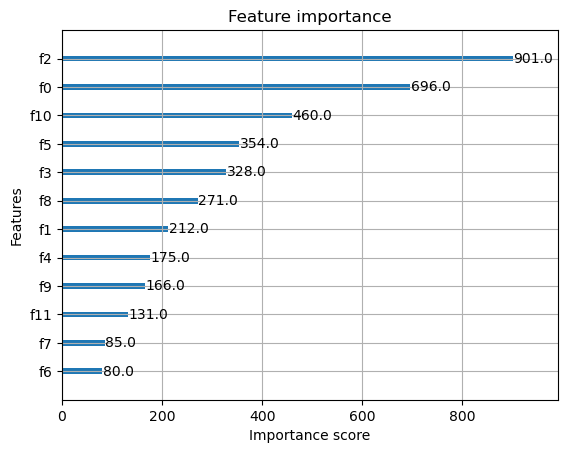

In [175]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(g)
plt.show()

In [176]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [177]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

label_map = {'<=50K': 0, '>50K': 1}
ytrain_num = ytrain.map(label_map)
ytest_num = ytest.map(label_map)

models = {
    "logistic_regression": LogisticRegression(),
    "random_forest": RandomForestClassifier(),
    "knn": KNeighborsClassifier(),
    "xgboost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')}

In [178]:
res = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(xtrain, ytrain_num)
    ypred = pipe.predict(xtest)
    
    accu = accuracy_score(ytest_num, ypred)
    res[name] = accu

    print(f"{name}: {accu:.4f}")
    print(classification_report(ytest_num, ypred))

logistic_regression: 0.8166
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      6727
           1       0.71      0.47      0.56      2276

    accuracy                           0.82      9003
   macro avg       0.77      0.70      0.72      9003
weighted avg       0.81      0.82      0.80      9003

random_forest: 0.8483
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6727
           1       0.74      0.62      0.67      2276

    accuracy                           0.85      9003
   macro avg       0.81      0.77      0.79      9003
weighted avg       0.84      0.85      0.84      9003

knn: 0.8217
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6727
           1       0.66      0.61      0.63      2276

    accuracy                           0.82      9003
   macro avg       0.77      0.75      0.76      9003
weighted avg

C:\Users\sharu\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:24:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [179]:
import pandas as pd

data = pd.read_csv(r"adult 3.csv")

data.occupation.replace({'?': 'others'}, inplace=True)
data.workclass.replace({'?': 'not_listed'}, inplace=True)

data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
data=data[data['hours-per-week'] >=3]
data=data[data['hours-per-week'] <=80]

data.drop(columns=['education', 'relationship'], inplace=True)
data = data[(data['age'] <= 70) & (data['age'] >= 18)]
data = data[data['educational-num'] >= 6]

cap=data['capital-gain'].quantile(0.99)
data['capital-gain']=data['capital-gain'].clip(upper=cap)
cap_loss = data['capital-loss'].quantile(0.99)
data['capital-loss'] = data['capital-loss'].clip(upper=cap_loss)
data.to_csv("piplin_salary_data.csv", index=False)
print("Cleaned dataset saved to data.csv")

Cleaned dataset saved to data.csv


C:\Users\sharu\AppData\Local\Temp\ipykernel_20104\2522682504.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?': 'others'}, inplace=True)
C:\Users\sharu\AppData\Local\Temp\ipykernel_20104\2522682504.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel

data = pd.read_csv("piplin_salary_data.csv")
x = data.drop(columns=['income'])
y = data['income'].map({'<=50K': 0, '>50K': 1})

categorical_cols = ["workclass", "occupation", "marital-status", "race", "gender", "native-country"]
numeric_cols = ["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]

In [181]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)])

In [182]:
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

pipeline = ImbPipeline(steps=[
    ("preprocessing", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("feature_select", SelectFromModel(estimator=xgb_base, threshold="median")),
    ("classifier", XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        learning_rate=0.1,
        n_estimators=150,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8
    ))
])

In [203]:
pipeline.fit(xtrain, ytrain)
joblib.dump(pipeline, r"xg_pipeline.pkl")
print("Model saved to xg_pipeline.pkl")

pred = pipeline.predict(xtest)

print("Accuracy:", accuracy_score(ytest, pred))
print("Classification Report:\n", classification_report(ytest, pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, pred))

C:\Users\sharu\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:24:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sharu\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:24:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model saved to xg_pipeline.pkl
Accuracy: 0.840049250055966
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      6675
           1       0.65      0.78      0.71      2259

    accuracy                           0.84      8934
   macro avg       0.79      0.82      0.80      8934
weighted avg       0.85      0.84      0.84      8934

Confusion Matrix:
 [[5737  938]
 [ 491 1768]]


In [202]:
import joblib
import pandas as pd

loa_piplin = joblib.load("xg_pipeline.pkl")
pred = loa_piplin.predict(xtest)
print(pred)

[0 1 0 ... 0 1 0]
